# AOS 51, Fall 2018, Lab #2

In Lab 1, we focused on Pandas Series. Today, we'll extend our skills into 2D Pandas data sets, which are called DataFrames.

---

In [19]:
# Let's import the pandas library and rename it to pd
import pandas as pd

# Creating DataFrames

Recall from Lab #4, that a Pandas Series is simply a 1D time series of data with an Index (e.g. a range of numbers, a range of dates).

Here are three Series of monthly mean, max, and min temperatures over LA spanning during 2017:

In [20]:
tavg = pd.Series([55.8, 57.2, 61.0, 63.6, 63.3, 66.7, 71.7, 72.0, 71.5, 71.5, 65.6, 61.4])
tmax = pd.Series([62.7, 62.6, 69.3, 71.9, 69.4, 72.6, 77.5, 77.3, 78.5, 80.4, 73.7, 72.4])
tmin = pd.Series([48.8, 51.8, 52.8, 55.4, 57.1, 60.9, 65.8, 66.8, 64.6, 62.5, 57.3, 50.3])

Rather than working on each Series individually, let's combine them into a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

DataFrames are usually abbreviated as "df".

An empty DataFrame is initialized with:

In [21]:
df = pd.DataFrame()

We can populate data into the DataFrame using the syntax:

`df[column_name] = column_data`

where:
   * `"column_name"` is the user-specified name of the column
   * `column_data` is the Series (OR list OR 1D numpy array) of data for that column

Let's assign the `tavg` Series a column name of "TAVG" and input that data into the DataFrame.

In [22]:
df['TAVG'] = tavg

In [23]:
df

,TAVG
0,55.8
1,57.2
2,61.0
3,63.6
4,63.3
5,66.7
6,71.7
7,72.0
8,71.5
9,71.5


---
** In-class exercise **

1. Initialize a new and empty DataFrame called "temp_df" 
2. Populate `temp_df` with three columns of data :
   * `TAVG` - 2017 monthly average temperatures over LA
   * `TMIN` - 2017 monthly min temperatures over LA
   * `TMAX` - 2017 monthly max temperatures over LA

---

In [25]:
temp_df = pd.DataFrame()
temp_df['TAVG'] = tavg
temp_df['TMIN'] = tmin
temp_df['TMAX'] = tmax
temp_df

,TAVG,TMIN,TMAX
0,55.8,48.8,62.7
1,57.2,51.8,62.6
2,61.0,52.8,69.3
3,63.6,55.4,71.9
4,63.3,57.1,69.4
5,66.7,60.9,72.6
6,71.7,65.8,77.5
7,72.0,66.8,77.3
8,71.5,64.6,78.5
9,71.5,62.5,80.4


# DatetimeIndex for DataFrames

Just as we did for Series, we can modify the Index to be a range of dates using the [pd.date_range](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) function and then reset the DataFrame Index to those dates.

Let's create a date range of months in 2017:

In [26]:
dates = pd.date_range(start='2017-01-01', end='2017-12-01', freq='MS')
dates

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')

Now we can reset the Index of `temp_df` to those dates with:

In [27]:
temp_df.index = dates

In [28]:
temp_df

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9
2017-05-01,63.3,57.1,69.4
2017-06-01,66.7,60.9,72.6
2017-07-01,71.7,65.8,77.5
2017-08-01,72.0,66.8,77.3
2017-09-01,71.5,64.6,78.5
2017-10-01,71.5,62.5,80.4


# Shape of DataFrames

Pandas DataFrames have a "shape" attribute to reveal the number of rows and columns in the DataFrame.

In [29]:
# (number of rows, number of columns)
temp_df.shape

(12, 3)

---
** --- In-class exercise --- **

Recall from Lab 1 that we can assign multiple variables and values on a single line, for instance:

`r_value, p_value = stats.pearsonr(x_data, y_data)`

Create variables called `nrows` and `ncols` and assign them to equal the number of rows and columns based on the output from `temp_df.shape`.

---

In [30]:
nrows, ncols = temp_df.shape
print('Number of rows = ' + str(nrows))
print('Number of columns = ' + str(ncols))

Number of rows = 12
Number of columns = 3


# Slicing DataFrames

Now that we have a full DataFrame, we can slice certain rows and/or columns for further analyses. 


** Slicing rows from the "head" or start of the DataFrame **

In [31]:
temp_df.head(1) # first row
temp_df.head(4) # first 4 rows

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9


** Slicing rows from the "tail" or end of the DataFrame **

In [32]:
temp_df.tail(1) # the last row
temp_df.tail(3) # the last 3 rows

,TAVG,TMIN,TMAX
2017-10-01,71.5,62.5,80.4
2017-11-01,65.6,57.3,73.7
2017-12-01,61.4,50.3,72.4


** Slicing a single column **

Extracting a single column from the DataFrame to work with a Series has the syntax:

`user-defined name of Series` = df['name of column to slice']`

As an example, to extract the "TAVG" column in `temp_df` and rename this now 1D Series of data to "tavg":

In [33]:
tavg = temp_df['TAVG']
tavg

2017-01-01    55.8
2017-02-01    57.2
2017-03-01    61.0
2017-04-01    63.6
2017-05-01    63.3
2017-06-01    66.7
2017-07-01    71.7
2017-08-01    72.0
2017-09-01    71.5
2017-10-01    71.5
2017-11-01    65.6
2017-12-01    61.4
Freq: MS, Name: TAVG, dtype: float64

This is simply the inverse syntax used to populate the DataFrame with a Series that we entered at the beginning of this lecture (`temp_df['TAVG'] = tavg`). 

---
** --- In-class exercise --- **
1. Extract the `TMIN` and `TMAX` columns in `temp_df` and assign them the Series names `tmin` and `tmax`.
2. How can you prove that `tmin` and `tmax` are Pandas Series data types?
---

In [34]:
tmin = temp_df['TMIN']
tmax = temp_df['TMAX']
type(tmin)
type(tmax)

pandas.core.series.Series

** Generalized slicing techniques**

Like Series, we can slice rows/columns either by (1) positions (row numbers) or (2) Index Labels.

Unlike Series, we now need to use two functions to slice DataFrames:

   1. `df.iloc` = slice by index position (the "i" means index location)
   2. `df.loc` = slice by index label

** 1. Slicing by position (df.iloc) **

The general syntax to slice by position is:

`df.iloc[row_selection]` 

or with row and column inputs:

`df.iloc[row_selection, column_selection]`

where row/column selections can be:

   * single value, e.g. [5] 
   * list of values, e.g. [0,1,2]
   * range of values, e.g. [3:6]


Let's demonstrate with examples of `temp_df`:

In [35]:
# Slice rows by position: 1st row (zeroth row index)
temp_df.iloc[0]

TAVG    55.8
TMIN    48.8
TMAX    62.7
Name: 2017-01-01 00:00:00, dtype: float64

In [36]:
# Slice rows by position: 2nd, 3rd, and 4th rows (1st, 2nd, and 3rd row indices)
temp_df.iloc[[1,2,3]]

,TAVG,TMIN,TMAX
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9


In [37]:
# Slice rows by position: range of 5-10th rows (4th-9th indices)
temp_df.iloc[4:10]

,TAVG,TMIN,TMAX
2017-05-01,63.3,57.1,69.4
2017-06-01,66.7,60.9,72.6
2017-07-01,71.7,65.8,77.5
2017-08-01,72.0,66.8,77.3
2017-09-01,71.5,64.6,78.5
2017-10-01,71.5,62.5,80.4


In [38]:
# Slice rows and columns by position: 2nd row, 1st column (1st row index, zeroth column index)
temp_df.iloc[1,0]

57.200000000000003

In [39]:
# Slice rows and columns by position: 1st and 3rd rows, 2nd and 3rd columns (zeroth and 2nd row index, 1st and 2nd column index)
temp_df.iloc[[0,2], [1,2]]

,TMIN,TMAX
2017-01-01,48.8,62.7
2017-03-01,52.8,69.3


In [40]:
# Slice rows and columns by position: range of 5-8th rows, 1-2nd columns (4-7th row indices, 0-1 col indices)
temp_df.iloc[4:8, 0:2]

,TAVG,TMIN
2017-05-01,63.3,57.1
2017-06-01,66.7,60.9
2017-07-01,71.7,65.8
2017-08-01,72.0,66.8


---
** In-class exercise **

1. Slice the 1st, 3rd, and 11th row in `temp_df`
2. Slice the 7th row and 1st column in `temp_df`
3. Slice the first five rows of first two columns in `temp_df`
---

In [41]:
temp_df.iloc[[0, 2, 10]] # 1st, 3rd, and 11th rows in a list
temp_df.iloc[6, 0] # 7th row and 1st column
temp_df.iloc[0:5, 0:2] # first five rows and first two columns 

,TAVG,TMIN
2017-01-01,55.8,48.8
2017-02-01,57.2,51.8
2017-03-01,61.0,52.8
2017-04-01,63.6,55.4
2017-05-01,63.3,57.1


** 2. Slicing by labels (df.loc) **

The general syntax to slice by label is:

`df.loc[row_selection]` 

or with row and column inputs:

`df.loc[row_selection, column_selection]`

where row/column selections can be:

   * single index/label value, e.g. ['2017-01-01'] 
   * list of values, e.g. ['2017-01-01', '2017-01-02']
   * range of values, e.g. ['2017-01-01':'2017-01-10']
   
Let's demonstate with examples on `temp_df`.

In [42]:
# Slice rows by label: row of '2017-05-01'
temp_df.loc['2017-05']

,TAVG,TMIN,TMAX
2017-05-01,63.3,57.1,69.4


In [43]:
# slice rows by label: rows of '2017-01-01' and '2017-15-01'
temp_df.loc[['2017-01', '2017-05']]

KeyError: "None of [['2017-01', '2017-05']] are in the [index]"

What happened here? 

Sometimes, when you tell Pandas to search for a list of items that are strings (like '2017-05-01'), it does not know to convert them to Pandas Timestamps and search for those Timestamps in the Index. 

So, we need to convert these dates from a string to a Pandas [Timestamp](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html). 

In [44]:
# slice rows by label: rows of '2017-01-01' and '2017-05-01'
temp_df.loc[[pd.Timestamp('2017-01'), pd.Timestamp('2017-05')]]

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-05-01,63.3,57.1,69.4


**Voila!**

In [45]:
# Slice rows by label: range of months from 2017-01-01 to 2017-05-01
temp_df.loc['2017-01':'2017-05']

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9
2017-05-01,63.3,57.1,69.4


In [46]:
# SLice rows and columns by label: range of months and columns TAVG, TMAX
temp_df.loc['2017-01':'2017-06',['TAVG','TMAX']]

,TAVG,TMAX
2017-01-01,55.8,62.7
2017-02-01,57.2,62.6
2017-03-01,61.0,69.3
2017-04-01,63.6,71.9
2017-05-01,63.3,69.4
2017-06-01,66.7,72.6


---
** In-class exericse **
1. Using labels, slice row 2017-08 and column TMAX
2. Using labels, slice the range of rows 2017-05 through 2017-10 and columns TAVG and TMIN
3. Using labels, slice rows 2017-03 and 2017-08 and column TMIN
---

In [47]:
#temp_df.loc['2017-08', ['TMAX']] # brackets around 'TMAX' are optional 
#temp_df.loc['2017-05':'2017-10', ['TAVG', 'TMAX']]
temp_df.loc[[pd.Timestamp('2017-08'), pd.Timestamp('2017-08')], ['TMIN']] # brackets around 'TMIN' are optional

,TMIN
2017-08-01,66.8
2017-08-01,66.8


# DataFrame Statistics

We can compute standard statistics on DataFrames by specifying the `axis` to compute the statistics on (either across rows or columns).

For example:

   * df.mean(axis=0/1) - take the mean across rows (axis=0) or columns (axis=1)
   * df.min(axis=0/1) - compute the min across rows (0) or columns (1)
   * df.max(axis=0/1) - compute the max across rows (0) or columns (1)

Let's check out `temp_df` to determine which axis we want to perform statitics across for our case.

In [48]:
temp_df

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9
2017-05-01,63.3,57.1,69.4
2017-06-01,66.7,60.9,72.6
2017-07-01,71.7,65.8,77.5
2017-08-01,72.0,66.8,77.3
2017-09-01,71.5,64.6,78.5
2017-10-01,71.5,62.5,80.4


Since our data is aligned along the rows, we'll want to compute statistics along the rows (i.e. across all dates).

In [49]:
temp_df.mean(axis=0) # average or mean TAVG, TMIN, and TMAX

TAVG    65.108333
TMIN    57.841667
TMAX    72.358333
dtype: float64

---
** --- In-class exercise --- **

Compute the minimum and maximum for each column of data in `temp_df`.

---

In [50]:
temp_df.min(axis=0) # minimum TAVG, TMIN, and TMAX
temp_df.max(axis=0) # maximum TAVG, TMIN, and TMAX

TAVG    72.0
TMIN    66.8
TMAX    80.4
dtype: float64

## Statistics Shortcut using .describe()

Pandas is smart and has many built-in functions to save you time crunching statistics. 

We can get a quick summary of standard statistics for any dataframe using `df.describe()`:

In [51]:
temp_df.describe()

,TAVG,TMIN,TMAX
count,12.000000,12.000000,12.000000
mean,65.108333,57.841667,72.358333
std,5.727042,6.235304,5.736083
min,55.800000,48.800000,62.600000
25%,61.300000,52.550000,69.375000
50%,64.600000,57.200000,72.500000
75%,71.500000,63.025000,77.350000
max,72.000000,66.800000,80.400000


# Column Arithmetic

Now that we know how to:
   * Create columns in a DataFrame
   * Extract coumns in a DataFrame
   * Code arithmetic using numpy/basic Python
  
we can easily create new columns of data by performing arithmetic on existing columns.

The general syntax is:

`df[new column name] = df[existing column] + [arithmetic on new column]`

For example, let's create new column called `TAVG(C)` where we convert `TAVG` (which is in units degrees F) to degrees C. 

In [52]:
temp_df['TAVG(C)'] = (temp_df['TAVG']-32) * (5/9)
temp_df

,TAVG,TMIN,TMAX,TAVG(C)
2017-01-01,55.8,48.8,62.7,13.222222
2017-02-01,57.2,51.8,62.6,14.000000
2017-03-01,61.0,52.8,69.3,16.111111
2017-04-01,63.6,55.4,71.9,17.555556
2017-05-01,63.3,57.1,69.4,17.388889
2017-06-01,66.7,60.9,72.6,19.277778
2017-07-01,71.7,65.8,77.5,22.055556
2017-08-01,72.0,66.8,77.3,22.222222
2017-09-01,71.5,64.6,78.5,21.944444
2017-10-01,71.5,62.5,80.4,21.944444


---
** In-class exercise **

1. Create a new column called `TMAX(K)` that converts `TMAX` from Fahrenheit to Kelvin. 

   Note: T(K) = T(F) + 459.67 x (5/9)
2. Create a new column called `TMIN(C-1.2)` that first converts `TMIN` from Fahrenheight to Celsius and then subtracts 1.2 degrees C from each item. 
---

In [53]:
temp_df['TAVG(K)'] = (temp_df['TAVG'] + 459.67) * (5/9)
temp_df['TMIN(C-1.2)'] = ((temp_df['TMIN'] - 32) * (5/9)) - 1.2
temp_df

,TAVG,TMIN,TMAX,TAVG(C),TAVG(K),TMIN(C-1.2)
2017-01-01,55.8,48.8,62.7,13.222222,286.372222,8.133333
2017-02-01,57.2,51.8,62.6,14.000000,287.150000,9.800000
2017-03-01,61.0,52.8,69.3,16.111111,289.261111,10.355556
2017-04-01,63.6,55.4,71.9,17.555556,290.705556,11.800000
2017-05-01,63.3,57.1,69.4,17.388889,290.538889,12.744444
2017-06-01,66.7,60.9,72.6,19.277778,292.427778,14.855556
2017-07-01,71.7,65.8,77.5,22.055556,295.205556,17.577778
2017-08-01,72.0,66.8,77.3,22.222222,295.372222,18.133333
2017-09-01,71.5,64.6,78.5,21.944444,295.094444,16.911111
2017-10-01,71.5,62.5,80.4,21.944444,295.094444,15.744444


# Plotting DataFrames

Plotting DataFrames has the same syntax as plotting Series:

`df.plot(kind = [kind of plot], color = [colors], title = "Plot title)`

In [54]:
# Line plots of TAVG, TMIN, TMAX
temp_df = temp_df[['TAVG', 'TMIN', 'TMAX']]
temp_df.plot(kind='line', 
             color=['green', 'blue', 'red'], 
             title='2017 LA Monthly Tavg, Tmax, Tmin (degrees F)')

---
**In-class exercise**

Seasonality of precipitation is vasty different across the US. Here are 2017 monthly precipitation amounts (unit: inches) across a few US cities - San Diego (SD), Miami (MIA), Detroit (DET). 

| |SD|MIA|DET|
|---|---|---|---|
|201701|3.02|3.41|2.84|
|201702|3.71|1.31|1.91|
|201703|0.08|3.93|4.26|
|201704|0.01|2.16|3.55|
|201705|0.92|2.69|4.38|
|201706|0.02|15.97|2.03|
|201707|0.00|12.45|2.44|
|201708|0.00|8.57|3.91|
|201709|0.08|14.97|0.91|
|201710|0.00|12.61|2.84|
|201711|0.02|4.41|4.93|
|201712|0.07|0.66|1.49|

1. Create a DataFrame storing this information with a Datetime Index.
2. Compute all the standard statistics of precipitation during 2017 for each city. 
3. Create a bar chart of this data.

              SD        MIA        DET
count  12.000000  12.000000  12.000000
mean    0.660833   6.927500   2.957500
std     1.297168   5.650537   1.260152
min     0.000000   0.660000   0.910000
25%     0.007500   2.557500   2.000000
50%     0.045000   4.165000   2.840000
75%     0.290000  12.490000   3.997500
max     3.710000  15.970000   4.930000


([<matplotlib.axis.XTick at 0x113827cc0>,
 <a list of 12 Text xticklabel objects>)

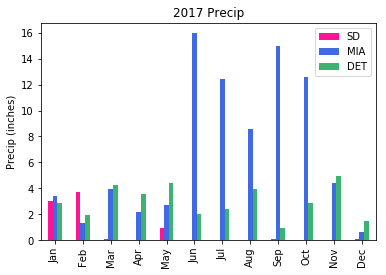

In [55]:
# Importing matplotlib for some customization of our Pandas plot
import matplotlib.pyplot as plt 

pr_df = pd.DataFrame()
pr_df['SD'] = [3.02, 3.71, 0.08, 0.01, 0.92, 0.02, 0.00, 0.00, 0.08, 0.00, 0.02, 0.07]
pr_df['MIA'] = [3.41, 1.31, 3.92, 2.16, 2.69, 15.97, 12.45, 8.57, 14.97, 12.61, 4.41, 0.66]
pr_df['DET'] = [2.84, 1.91, 4.26, 3.55, 4.38, 2.03, 2.44, 3.91, 0.91, 2.84, 4.93, 1.49]

stats = pr_df.describe()
print(stats)

pr_df.plot(kind='bar',
          color = ['deeppink', 'royalblue', 'mediumseagreen'],
          title = '2017 Precip')

# Customizations through Matplotlib (not covered in lecture)
plt.ylabel('Precip (inches)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])